## THIS IS THE THIRD NOTEBOOK FOR THE FINAL PROJECT

In [1]:
# A. Once again we import the data (2. Pull data from HDF5 file created in notebook 
#    ONE again) we created in notebook ONE 'data_features.h5'. This data has the 
#    information downloaded from oanda plus the features we have created
# B. We choose the 'test' data (3. Select the test dataset - THIS IS DATA NOT 
#    PREVIOUSLY SEEN BY THE MODEL). 
# C. Make sure we have the same features (4. Make sure same features used in backtest 
#    for finalised model are used on test) for our 'test' as we did for 'training' and  
#    'validating'. (old_featdrop should be 20 and new_featdrop should be 1). 
# D. Having saved the model we trained and validated to pickle (5. load the model 
#    from pickle), we reload it so that we can use it again on the testing data
# E. Finally run the saved model on the 'test' data (6. Run the model on test dataset).

## 1. Imports

In [2]:
import sys
sys.path.insert(0, '/root/')

In [3]:
from tpqoa import tpqoa
import numpy as np
import pandas as pd
import tables as tb
import tstables as tstb
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn import linear_model
import pickle

## 2. Pull data from HDF5 file created in notebook ONE again

In [4]:
h6 = pd.HDFStore('/root/pyalgocourse/final_project/data_features.h5','r')

In [5]:
data = h6['data']

In [6]:
h6.close()

## 3. Select the test dataset - THIS IS DATA NOT PREVIOUSLY SEEN BY THE MODEL

In [7]:
test = data[9600:]
final_test = test.copy()

## 4. Make sure same features used in backtest for finalised model are used on test

In [8]:
# use this to drop some of the lagged returns, drop none, drop = 30, drop all, drop =0 
# in our test amnd validate backtest we used 20 lagged 'Returns' plus 1 days lag for 'RSI'
# and 'MACD'
old_featdrop = 20
new_featdrop = 1
# decision after testing old_featdrop = 20 and new_featdrop = 1
dropped = []
features = data.columns
old_features = ['Returns']
new_features = ['RSI','MACD']

for feature in new_features:
    for drope in range(new_featdrop + 1, 29 + 1):
        drp = '%s_lag_%d' % (feature, drope)
        dropped.append(drp)

for feat in old_features:
    for dro in range(old_featdrop + 1, 29 + 1):
        drp1 = '%s_lag_%d' % (feat, dro)
        dropped.append(drp1)

cols = data.columns.drop(dropped)
cols = cols.drop(['AUDUSD','RSI','MACD','Returns'])

## 5. load the model from pickle

In [9]:
# we saved the model we trained and validated. We now load it so that
# we can use it again on the test data
LinMod = pickle.load(open('final_model.sav', 'rb'))

## 6. Run the model on test dataset

In [10]:
pred = LinMod.predict(test[cols])

In [11]:
final_test.loc[:,'Position'] = pred

In [12]:
final_test.loc[:,'Strategy'] = final_test.loc[:,'Position'] * final_test.loc[:,'Returns']

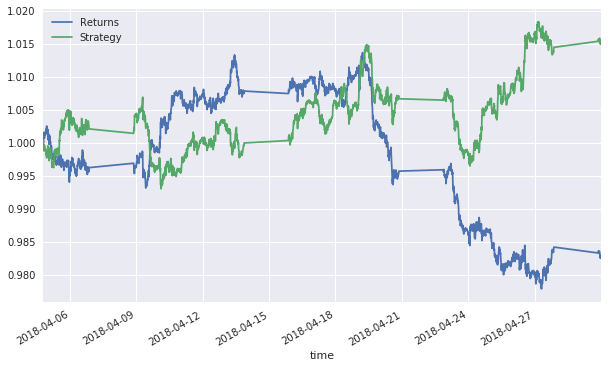

In [13]:
final_test[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));

In [14]:
# Once again our model outperforms. This time on data not previously seen.
# However it should  be noted that no account has been taken for bid/ask
# spreads or slippage
mean = final_test[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.255679
Strategy    0.219392
dtype: float64

In [15]:
std = final_test[['Returns','Strategy']].std() * 6 * 24 * 252
std

Returns     14.369444
Strategy    14.370044
dtype: float64

## NOW GO TO NOTEBOOK -> FOUR_tradingstrategy.ipynb